In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 999

In [3]:
public = pd.read_csv("data/PublicSector_Indicators.csv", delimiter=';', dtype={'Year': 'int16'}).dropna()
edu = pd.read_csv("data/EducationAndEnviron_Data.csv", delimiter=';', dtype={'Year': 'int16'}).dropna()

In [4]:
public

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
20,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Brazil,BRA,1970,1.641000e+02
22,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,India,IND,1970,9.630000e+01
24,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,South Africa,ZAF,1970,5.680000e+01
25,"Air transport, passengers carried",IS.AIR.PSGR,Brazil,BRA,1970,3.339800e+06
27,"Air transport, passengers carried",IS.AIR.PSGR,India,IND,1970,2.671600e+06
...,...,...,...,...,...,...
81490,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,Brazil,BRA,2019,6.728900e+01
81491,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,China,CHN,2019,5.325200e+01
81492,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,India,IND,2019,2.371500e+01
81493,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,Russian Federation,RUS,2019,9.321000e+01


In [5]:
edu

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
24,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,South Africa,ZAF,1970,67.669150
29,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,South Africa,ZAF,1970,68.242070
34,"Adjusted net enrollment rate, primary, male (%...",SE.PRM.TENR.MA,South Africa,ZAF,1970,67.096420
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970,23.378048
56,Agricultural land (% of land area),AG.LND.AGRI.ZS,China,CHN,1970,39.900940
...,...,...,...,...,...,...
71480,Urban population growth (annual %),SP.URB.GROW,Brazil,BRA,2019,1.045678
71481,Urban population growth (annual %),SP.URB.GROW,China,CHN,2019,2.292727
71482,Urban population growth (annual %),SP.URB.GROW,India,IND,2019,2.305597
71483,Urban population growth (annual %),SP.URB.GROW,Russian Federation,RUS,2019,0.134449


In [6]:
# 5 países analisados em 50 anos. máximo de linhas por métrica: 250

In [7]:
# análise dos dados
public.query("CountryCode == 'BRA'").SeriesName.value_counts()[:40]

Military expenditure (% of GDP)                                       50
Military expenditure (current LCU)                                    50
Military expenditure (current USD)                                    50
Refugee population by country or territory of asylum                  50
Arms imports (SIPRI trend indicator values)                           50
Air transport, freight (million ton-km)                               49
Air transport, registered carrier departures worldwide                49
Air transport, passengers carried                                     49
Fixed telephone subscriptions                                         46
Fixed telephone subscriptions (per 100 people)                        46
Mobile cellular subscriptions (per 100 people)                        45
Mobile cellular subscriptions                                         45
Arms exports (SIPRI trend indicator values)                           43
Unemployment, total (% of total labor force) (natio

In [8]:
# análise dos dados
edu.query("CountryCode == 'BRA'")

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970,2.337805e+01
60,Agricultural land (sq. km),AG.LND.AGRI.K2,Brazil,BRA,1970,1.953970e+06
65,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,Brazil,BRA,1970,1.658700e+05
70,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,Brazil,BRA,1970,4.739143e+01
75,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,Brazil,BRA,1970,6.085901e+01
...,...,...,...,...,...,...
71155,Rural population growth (annual %),SP.RUR.TOTL.ZG,Brazil,BRA,2019,-1.165298e+00
71285,"Secondary education, duration (years)",SE.SEC.DURS,Brazil,BRA,2019,7.000000e+00
71470,Urban population,SP.URB.TOTL,Brazil,BRA,2019,1.832416e+08
71475,Urban population (% of total population),SP.URB.TOTL.IN.ZS,Brazil,BRA,2019,8.682400e+01


In [9]:
# análise
edu.query("CountryCode == 'BRA'").SeriesName.value_counts().filter(regex='Electricity')

Electricity production from renewable sources, excluding hydroelectric (kWh)           45
Electricity production from oil sources (% of total)                                   45
Electricity production from coal sources (% of total)                                  45
Electricity production from hydroelectric sources (% of total)                         45
Electricity production from renewable sources, excluding hydroelectric (% of total)    45
Electricity production from natural gas sources (% of total)                           45
Electricity production from oil, gas and coal sources (% of total)                     45
Electricity production from nuclear sources (% of total)                               44
Name: SeriesName, dtype: int64

In [10]:
#análise
edu.query("CountryCode == 'BRA'").SeriesName.value_counts()

Population in largest city                                                                                                           50
Population in the largest city (% of urban population)                                                                               50
Lower secondary school starting age (years)                                                                                          50
Rural population growth (annual %)                                                                                                   50
Population in urban agglomerations of more than 1 million                                                                            50
Urban population (% of total population)                                                                                             50
Population in urban agglomerations of more than 1 million (% of total population)                                                    50
Secondary education, duration (years)           

In [11]:
# possui só 6 pontos
edu[(edu.SeriesName == "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)")]

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
345,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,1970,1.97546
8925,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,1976,4.30000
14645,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,1980,4.97579
57546,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,China,CHN,2010,3.57765
57548,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Russian Federation,RUS,2010,59.26088
58977,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,India,IND,2011,9.13629
64699,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,South Africa,ZAF,2015,6.06522
66125,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,2016,15.34518
67555,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,2017,15.73458
67559,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,South Africa,ZAF,2017,8.24519


In [12]:
# unindo os dois dataframes, pegando só valores pro Brasil
merge = edu.merge(public, how='outer').query("CountryCode == 'BRA'")

In [13]:
merge

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
3,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970,2.337805e+01
7,Agricultural land (sq. km),AG.LND.AGRI.K2,Brazil,BRA,1970,1.953970e+06
11,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,Brazil,BRA,1970,1.658700e+05
15,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,Brazil,BRA,1970,4.739143e+01
19,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,Brazil,BRA,1970,6.085901e+01
...,...,...,...,...,...,...
56673,"Vulnerable employment, male (% of male employm...",SL.EMP.VULN.MA.ZS,Brazil,BRA,2019,3.101000e+01
56678,"Vulnerable employment, total (% of total emplo...",SL.EMP.VULN.ZS,Brazil,BRA,2019,2.790800e+01
56683,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,Brazil,BRA,2019,7.300500e+01
56688,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,Brazil,BRA,2019,6.305300e+01


In [14]:
mask = merge.SeriesName.value_counts() > 45
mask

Urban population                                                                                                                      True
Arms imports (SIPRI trend indicator values)                                                                                           True
Rural population                                                                                                                      True
Military expenditure (current USD)                                                                                                    True
Rural population (% of total population)                                                                                              True
Primary education, duration (years)                                                                                                   True
Secondary education, duration (years)                                                                                                 True
Urban population (% of tota

In [15]:
columns = mask[mask].index.tolist()
columns

['Urban population',
 'Arms imports (SIPRI trend indicator values)',
 'Rural population',
 'Military expenditure (current USD)',
 'Rural population (% of total population)',
 'Primary education, duration (years)',
 'Secondary education, duration (years)',
 'Urban population (% of total population)',
 'Military expenditure (% of GDP)',
 'Population in urban agglomerations of more than 1 million',
 'Lower secondary school starting age (years)',
 'Population in largest city',
 'Military expenditure (current LCU)',
 'Population in the largest city (% of urban population)',
 'Urban population growth (annual %)',
 'Rural population growth (annual %)',
 'Refugee population by country or territory of asylum',
 'Primary school starting age (years)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Forest rents (% of GDP)',
 'Air transport, freight (million ton-km)',
 'Natural gas rents (% of GDP)',
 'Oil rents (% of GDP)',
 'Mineral rents (% of GDP)',
 'To

In [16]:
data = (
    merge
    .pivot(index='Year', columns='SeriesName', values='Value')
    [columns]
    .dropna()
)
data

SeriesName,Urban population,Arms imports (SIPRI trend indicator values),Rural population,Military expenditure (current USD),Rural population (% of total population),"Primary education, duration (years)","Secondary education, duration (years)",Urban population (% of total population),Military expenditure (% of GDP),Population in urban agglomerations of more than 1 million,...,Arable land (hectares per person),CO2 emissions (kt),Livestock production index (2004-2006 = 100),Agricultural land (sq. km),Arable land (% of land area),Crop production index (2004-2006 = 100),Permanent cropland (% of land area),Aquaculture production (metric tons),Fixed telephone subscriptions (per 100 people),Fixed telephone subscriptions
Year,,,,,,,,,,,,,,,,,,,,,
1975,65175659.0,539000000.0,42040546.0,2.141127e+09,39.211,4.0,7.0,60.789,1.972144,32986816.0,...,0.391732,151164.741,23.46,2.134160e+06,5.025041,36.60,0.767635,286.0,2.053087,2201242.0
1976,67790415.0,582000000.0,42000523.0,2.576477e+09,38.255,4.0,7.0,61.745,2.002753,34491112.0,...,0.391653,155154.437,25.41,2.160070e+06,5.144685,37.55,0.802451,433.0,2.286163,2510000.0
1977,70478354.0,554000000.0,41947038.0,2.499645e+09,37.311,4.0,7.0,62.689,1.687726,36068791.0,...,0.391371,162961.480,25.66,2.185500e+06,5.264329,41.21,0.831525,780.0,2.721805,3060000.0
1978,73245834.0,895000000.0,41875319.0,2.690623e+09,36.375,4.0,7.0,63.625,1.599672,37730700.0,...,0.382206,176925.416,27.01,2.200390e+06,5.264329,39.41,0.866102,1132.0,3.231378,3720000.0
1979,76091693.0,407000000.0,41786718.0,2.829161e+09,35.449,4.0,7.0,64.551,1.521932,39479499.0,...,0.380901,188322.452,28.68,2.225130e+06,5.372009,41.11,0.898884,1687.0,3.639405,4290073.0
1980,79015954.0,367000000.0,41678055.0,2.259307e+09,34.532,4.0,7.0,65.468,1.138434,41322855.0,...,0.372844,187090.340,31.90,2.242780e+06,5.383973,45.45,0.940879,3737.0,4.101281,4950000.0
1981,82013626.0,64000000.0,41556701.0,2.517860e+09,33.630,4.0,7.0,66.370,1.143149,42524411.0,...,0.369021,171806.284,32.92,2.258240e+06,5.455759,47.54,0.900200,5794.0,4.313333,5330000.0
1982,85085296.0,75000000.0,41413018.0,3.031329e+09,32.738,4.0,7.0,67.262,1.303534,43616135.0,...,0.371546,172176.651,33.30,2.281360e+06,5.623261,48.78,0.853778,7586.0,4.602747,5822397.0
1983,88209014.0,92000000.0,41239805.0,2.082669e+09,31.858,4.0,7.0,68.142,1.254580,44742317.0,...,0.363078,166632.147,34.36,2.288210e+06,5.623261,47.47,0.792162,9168.0,4.866788,6300000.0


In [17]:
co2_corr = data.corr().loc['CO2 emissions (kt)'].sort_values()
co2_corr

SeriesName
Rural population                                                                    -0.959914
Urban population growth (annual %)                                                  -0.937913
Rural population (% of total population)                                            -0.904385
Population in the largest city (% of urban population)                              -0.851607
CO2 emissions from liquid fuel consumption (% of total)                             -0.808993
Primary school starting age (years)                                                 -0.633785
Forest rents (% of GDP)                                                             -0.631532
Coal rents (% of GDP)                                                               -0.523928
Refugee population by country or territory of asylum                                -0.410566
Rural population growth (annual %)                                                  -0.350021
Military expenditure (% of GDP)                  

In [18]:
metricas = co2_corr[(abs(co2_corr) > .4) & (co2_corr != 1)].index.to_series().sort_values().reset_index(drop=True)
metricas

0                    Agricultural land (% of land area)
1                            Agricultural land (sq. km)
2               Air transport, freight (million ton-km)
3                     Air transport, passengers carried
4     Air transport, registered carrier departures w...
5                  Aquaculture production (metric tons)
6                          Arable land (% of land area)
7                                Arable land (hectares)
8                CO2 emissions (kg per 2010 US$ of GDP)
9                CO2 emissions (metric tons per capita)
10    CO2 emissions from gaseous fuel consumption (%...
11     CO2 emissions from gaseous fuel consumption (kt)
12    CO2 emissions from liquid fuel consumption (% ...
13      CO2 emissions from liquid fuel consumption (kt)
14       CO2 emissions from solid fuel consumption (kt)
15                      Cereal production (metric tons)
16                        Cereal yield (kg per hectare)
17                                Coal rents (% 

In [19]:
manter = [0, 2, 3, 6, 15, 17, 19, 22, 26, 27, 28, 34, 36, 37, 43]

In [20]:
X_columns = [x for idx, x in enumerate(metricas) if idx in manter]

In [21]:
X_columns

['Agricultural land (% of land area)',
 'Air transport, freight (million ton-km)',
 'Air transport, passengers carried',
 'Arable land (% of land area)',
 'Cereal production (metric tons)',
 'Coal rents (% of GDP)',
 'Fixed telephone subscriptions',
 'Forest rents (% of GDP)',
 'Mineral rents (% of GDP)',
 'Natural gas rents (% of GDP)',
 'Oil rents (% of GDP)',
 'Primary education, duration (years)',
 'Refugee population by country or territory of asylum',
 'Rural population',
 'Urban population growth (annual %)']

In [22]:
X = data[X_columns]
X

SeriesName,Agricultural land (% of land area),"Air transport, freight (million ton-km)","Air transport, passengers carried",Arable land (% of land area),Cereal production (metric tons),Coal rents (% of GDP),Fixed telephone subscriptions,Forest rents (% of GDP),Mineral rents (% of GDP),Natural gas rents (% of GDP),Oil rents (% of GDP),"Primary education, duration (years)",Refugee population by country or territory of asylum,Rural population,Urban population growth (annual %)
Year,,,,,,,,,,,,,,,
1975,25.533911,460.500000,7772900.0,5.025041,26238419.0,0.026408,2201242.0,0.997954,0.677337,0.001424,0.413600,4.0,32000.0,42040546.0,3.965759
1976,25.843908,471.600006,8799000.0,5.144685,31143200.0,0.029330,2510000.0,0.707062,0.869484,0.001271,0.342684,4.0,30000.0,42000523.0,3.933474
1977,26.148162,499.299988,9514400.0,5.264329,30913834.0,0.030195,3060000.0,0.886580,0.619921,0.000573,0.241853,4.0,36000.0,41947038.0,3.888481
1978,26.326312,571.299988,10621300.0,5.264329,24033646.0,0.026974,3720000.0,0.948674,0.492684,0.000857,0.232256,4.0,35000.0,41875319.0,3.851575
1979,26.622311,570.500000,11856900.0,5.372009,27147322.0,0.024506,4290073.0,1.198495,0.557990,0.003195,0.544412,4.0,25000.0,41786718.0,3.811773
1980,26.833482,588.200012,13008100.0,5.383973,33217492.0,0.030348,4950000.0,1.337116,0.714607,0.006710,0.721189,4.0,24000.0,41678055.0,3.771068
1981,27.018451,644.900024,12594600.0,5.455759,32050567.0,0.044340,5330000.0,1.084505,0.633340,0.004347,0.633203,4.0,24000.0,41556701.0,3.723562
1982,27.295068,734.700012,13168300.0,5.623261,33838263.0,0.049714,5822397.0,1.456603,0.655232,0.002455,0.455444,4.0,5400.0,41413018.0,3.676883
1983,27.377024,692.099976,12605900.0,5.623261,29197566.0,0.043846,6300000.0,1.300205,0.912540,0.012402,1.078204,4.0,5400.0,41239805.0,3.605492


In [23]:
y = data['CO2 emissions (kt)']
y

Year
1975    151164.741
1976    155154.437
1977    162961.480
1978    176925.416
1979    188322.452
1980    187090.340
1981    171806.284
1982    172176.651
1983    166632.147
1984    168806.678
1985    181248.809
1986    198883.412
1987    207530.198
1988    209363.698
1989    214024.455
1990    208886.988
1991    219330.604
1992    220705.729
1993    230738.641
1994    242154.012
1995    258347.484
1996    284782.887
1997    300547.320
1998    312289.054
1999    320173.104
2000    327983.814
2001    337433.673
2002    332266.870
2003    321621.569
2004    337826.042
2005    347308.904
2006    347668.270
2007    363212.683
2008    387631.236
2009    367147.374
2010    419754.156
2011    439412.943
2012    470028.726
2013    503677.118
2014    533530.165
2015    504388.516
2016    462298.690
Name: CO2 emissions (kt), dtype: float64

In [46]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt

In [25]:
X_scaler = MinMaxScaler()
X_norm = X_scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [27]:
# Reg. Linear
reg = LinearRegression()
reg.fit(X_train, y_train)
r2_score(y_test.values, reg.predict(X_test))

0.9821814941311667

In [28]:
# Descida do Grad.
reg_grad = SGDRegressor(max_iter=200000, alpha=0)
reg_grad.fit(X_train, y_train)
r2_score(y_test.values, reg_grad.predict(X_test))

/home/laryssacosta/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.9809312206856786

In [29]:
# KNN
for i in range(2, 6):
    neigh = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    neigh.fit(X_train, y_train)

    print(f"R2 para {i} vizinhos: {r2_score(y_test.values, neigh.predict(X_test))}\n")

R2 para 2 vizinhos: 0.9763901139319283

R2 para 3 vizinhos: 0.976336267523206

R2 para 4 vizinhos: 0.962591426654698

R2 para 5 vizinhos: 0.9462266083760483



In [30]:
from sklearn.linear_model import Lasso, Ridge

In [31]:
# criando uma nova partição treino-teste (lasso e ridge não precisam de normalização prévia?)
X_l1l2_train, X_l1l2_test, y_l1l2_train, y_l1l2_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Lasso

In [32]:
# R2 para diversos alphas/lambdas

for i in [1, 10, 100, 1E4, 1E6, 1E9]:
    l1 = Lasso(alpha=i, max_iter=100000)
    l1.fit(X_l1l2_train, y_l1l2_train)
    print(f"R2 para alpha = {i}: {r2_score(y_l1l2_test.values, l1.predict(X_l1l2_test))}\n")

R2 para alpha = 1: 0.9824630408965593

R2 para alpha = 10: 0.979357447590431

R2 para alpha = 100: 0.9790614713082422

R2 para alpha = 10000.0: 0.9694769302258456

R2 para alpha = 1000000.0: 0.9692303665545281

R2 para alpha = 1000000000.0: 0.9709627898616895



In [33]:
alphas = np.arange(1, 1E6, 100)

In [34]:
# vetor para plotar R² x alpha/lambda

l1_R2 = []
for i in alphas:
    l1 = Lasso(alpha=i, max_iter=100000)
    l1.fit(X_l1l2_train, y_l1l2_train)
    l1_R2.append(r2_score(y_l1l2_test.values, l1.predict(X_l1l2_test)))

Text(0, 0.5, 'R²')

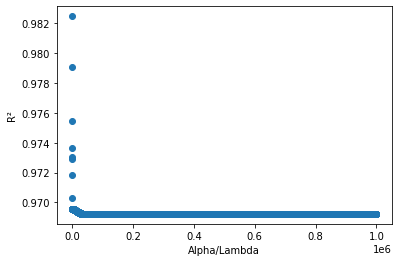

In [35]:
plt.scatter(alphas, l1_R2)
plt.xlabel("Alpha/Lambda")
plt.ylabel("R²")

In [36]:
# coeficientes para as variáveis, de acordo com o alpha/lambda escolhido
l1 = Lasso(alpha=1000, max_iter=100000)
l1.fit(X_l1l2_train, y_l1l2_train)
pd.Series(index=X_columns, data=l1.coef_).sort_values()

Rural population                                       -0.017176
Fixed telephone subscriptions                          -0.001737
Agricultural land (% of land area)                     -0.000000
Arable land (% of land area)                           -0.000000
Coal rents (% of GDP)                                   0.000000
Forest rents (% of GDP)                                -0.000000
Mineral rents (% of GDP)                                0.000000
Natural gas rents (% of GDP)                            0.000000
Oil rents (% of GDP)                                    0.000000
Primary education, duration (years)                     0.000000
Urban population growth (annual %)                      0.000000
Cereal production (metric tons)                         0.000886
Air transport, passengers carried                       0.001366
Refugee population by country or territory of asylum    0.229518
Air transport, freight (million ton-km)                 1.960639
dtype: float64

## Ridge

In [37]:
# R2 para diversos alphas/lambdas
for i in [1, 10, 100, 1E4, 1E6, 1E9]:
    l2 = Ridge(alpha=i, max_iter=100000)
    l2.fit(X_l1l2_train, y_l1l2_train)
    print(f"R2 para alpha = {i}: {r2_score(y_l1l2_test.values, l2.predict(X_l1l2_test))}\n")

R2 para alpha = 1: 0.9714520626020964

R2 para alpha = 10: 0.9689382114627016

R2 para alpha = 100: 0.9694574176692875

R2 para alpha = 10000.0: 0.9695813822813977

R2 para alpha = 1000000.0: 0.9693464698084642

R2 para alpha = 1000000000.0: 0.9691506281510989



/home/laryssacosta/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55641e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [38]:
# vetor para plotar R² x alpha/lambda
l2_R2 = []
for i in alphas:
    l2 = Ridge(alpha=i, max_iter=100000)
    l2.fit(X_l1l2_train, y_l1l2_train)
    l2_R2.append(r2_score(y_l1l2_test.values, l2.predict(X_l1l2_test)))

/home/laryssacosta/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55641e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Text(0, 0.5, 'R²')

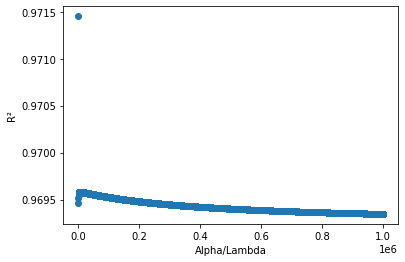

In [39]:
plt.scatter(alphas, l2_R2)
plt.xlabel("Alpha/Lambda")
plt.ylabel("R²")

In [40]:
# coeficientes para as variáveis, de acordo com o alpha/lambda escolhido
l2 = Ridge(alpha=1000, max_iter=100000)
l2.fit(X_l1l2_train, y_l1l2_train)
pd.Series(index=X_columns, data=l2.coef_).sort_values()

Arable land (% of land area)                           -17.478845
Agricultural land (% of land area)                      -5.548096
Forest rents (% of GDP)                                 -1.296807
Rural population                                        -0.017182
Fixed telephone subscriptions                           -0.001738
Cereal production (metric tons)                          0.000886
Air transport, passengers carried                        0.001367
Coal rents (% of GDP)                                    0.193576
Refugee population by country or territory of asylum     0.229890
Natural gas rents (% of GDP)                             0.732357
Air transport, freight (million ton-km)                  2.024528
Primary education, duration (years)                      3.987567
Mineral rents (% of GDP)                                 9.953018
Oil rents (% of GDP)                                    14.534960
Urban population growth (annual %)                      20.744651
dtype: flo

In [41]:
# Polynomial
# for i in range(1, 11):
#     poly = PolynomialFeatures(degree = i)
#     X_poly = poly.fit_transform(X_norm)
    
#     X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

#     regression = LinearRegression().fit(X_train, y_train)
#     print(f"Partição de Treino (grau {i}): {r2_score(y_train, regression.predict(X_train))}")

#     print(f"Partição de Teste (grau {i}): {r2_score(y_test, regression.predict(X_test))}\n")

In [42]:
# Linear Univariável

X_2 = data['Rural population']
y_2 = data['CO2 emissions (kt)']

In [43]:
X_2_train, X_2_test, y_2_train, Y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

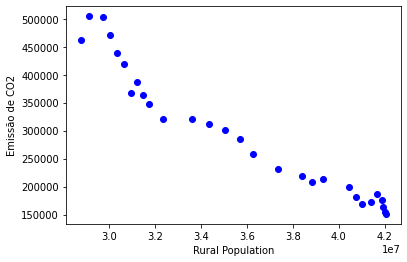

In [44]:
plt.scatter(X_2_train, y_2_train, color='blue')
plt.xlabel("Rural Population")
plt.ylabel("Emissão de CO2")
plt.show()


In [47]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo =  linear_model.LinearRegression()

# TREINAR O MODELO USANDO O DATASET DE TESTE
# PARA ENCONTRAR O VALOR DE A E B (Y = A + B.X)
modelo.fit(X_2_train.values.reshape(-1,1), y_2_train.values.reshape(-1,1))

LinearRegression()

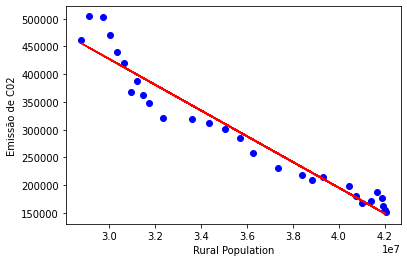

In [48]:
plt.scatter(X_2_train, y_2_train, color='blue')
plt.plot(X_2_train, modelo.coef_[0][0]*X_2_train + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Rural Population")
plt.show()

In [49]:

#Primeiro a gente tem que fazer as predições usando o modelo e base de teste
predicoesCo2 = modelo.predict(X_2_test.values.reshape(-1,1))

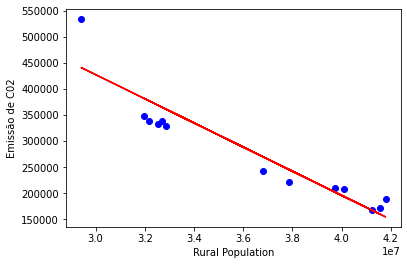

In [50]:
plt.scatter(X_2_test, Y_2_test, color='blue')
plt.plot(X_2_test, modelo.coef_[0][0]*X_2_test + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Rural Population")
plt.show()

In [51]:
#Agora é mostrar as métricas
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_2_test, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_2_test, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(Y_2_test, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , Y_2_test))

Erro Quadrático Médio (MSE): 1339069216.30
Erro Médio Absoluto (MAE): 29490.44
Raiz do Erro Quadrático Médio (RMSE): 36593.29 
R2-score: 0.86
